# Clase 8 - Reconocimiento de Patrones en Imagenes

En esta clase se estudia la extracción y análisis de características de textura en colecciones de imágenes, utilizando la matriz de co-ocurrencia de niveles de gris (GLCM) y agrupamiento por tipo de textura.

- **GLCM (Gray Level Co-occurrence Matrix):** Permite calcular propiedades estadísticas de la textura, como contraste, correlación, disimilitud, homogeneidad, ASM y energía, a partir de la distribución de pares de valores de intensidad.
- **Extracción de características:** Se procesan múltiples imágenes para obtener un conjunto de descriptores de textura, facilitando la comparación y clasificación entre diferentes tipos de texturas.
- **Agrupamiento y visualización:** Las imágenes se agrupan por tipo de textura (tela, pasto, cemento) y se visualizan en gráficos para analizar la separación entre grupos y la relevancia de las características extraídas.

El código implementa estos conceptos para analizar una colección de imágenes, extraer sus características de textura y visualizar la agrupación y comparación entre diferentes tipos de texturas.

In [19]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.io import imread_collection
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import MinMaxScaler

images = imread_collection('IMG/texturas_fisher/textura_*.tif')
print(images)


['IMG/texturas_fisher/textura_1.tif', 'IMG/texturas_fisher/textura_2.tif', 'IMG/texturas_fisher/textura_3.tif', 'IMG/texturas_fisher/textura_4.tif', 'IMG/texturas_fisher/textura_5.tif', 'IMG/texturas_fisher/textura_6.tif', 'IMG/texturas_fisher/textura_7.tif', 'IMG/texturas_fisher/textura_8.tif', 'IMG/texturas_fisher/textura_9.tif', 'IMG/texturas_fisher/textura_10.tif', 'IMG/texturas_fisher/textura_11.tif', 'IMG/texturas_fisher/textura_12.tif', 'IMG/texturas_fisher/textura_13.tif', 'IMG/texturas_fisher/textura_14.tif', 'IMG/texturas_fisher/textura_15.tif']


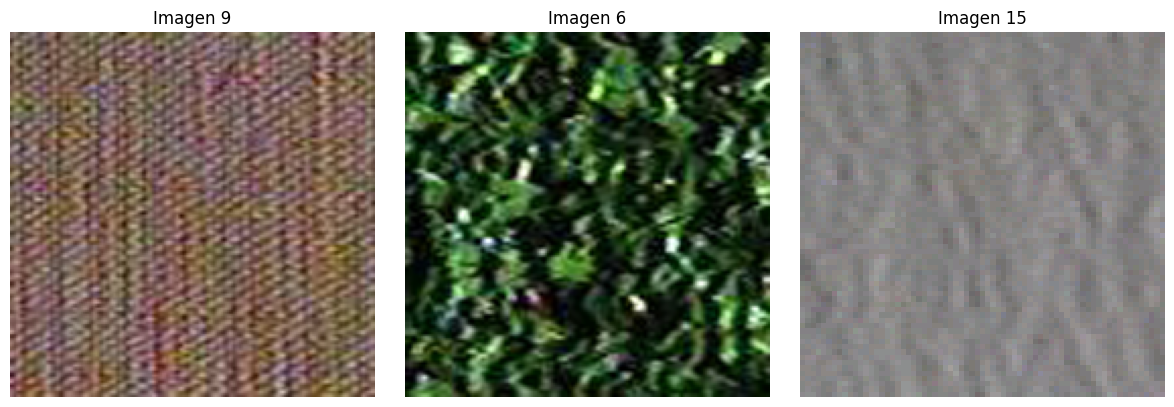

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
img_indices = [8, 5, 14]  # Python usa índice base 0, por eso 9->8, 6->5, 15->14
for ax, idx in zip(axs, img_indices):
    ax.imshow(images[idx].data, cmap='gray')
    ax.set_title(f'Imagen {idx+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [15]:
def extract_features(images,scale):
    result = []
    for im in images:
        # convertimos la imagen a escala de grises
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        columna =  gray.reshape(-1,1)

        # niveles de intensidad
        nueva_escala =  (0,scale)
        niveles = max(nueva_escala)+1

        resultado = MinMaxScaler(nueva_escala).fit_transform(columna).astype(int)
        resultado = resultado.reshape(gray.shape)

        #calculamos la matriz de co-ocurrencia
        comat =graycomatrix(resultado, angles=[0],distances=[1], levels=niveles)

        features = ['contrast','correlation', 'dissimilarity','homogeneity','ASM','energy']
        S = []
            # para cada imagen extraemos las caracteristicas definidas en la lista features
        for ft in features:
            sts = graycoprops(comat, ft).squeeze()
            S.append(float(sts))
        result.append(S)
    S = pd.DataFrame(result, columns=features, index=[f'{i+1}' for i in range(len(images))])
    return S

In [16]:
tble1 = extract_features(images,30)
print(tble1)
print("--------------------------------------------------------------------------")
print(extract_features(images,20))

     contrast  correlation  dissimilarity  homogeneity       ASM    energy
1    6.875481     0.742259       2.081068     0.358111  0.008884  0.094253
2    5.886530     0.837685       1.925140     0.379689  0.007839  0.088539
3   16.465251     0.785335       2.818855     0.372568  0.013732  0.117184
4    5.265549     0.919111       1.636809     0.465551  0.011818  0.108709
5    6.121819     0.910711       1.724115     0.465518  0.012961  0.113845
6    4.428523     0.921544       1.466201     0.503423  0.017252  0.131348
7    6.572843     0.821740       2.039261     0.362802  0.007385  0.085939
8    6.879299     0.818289       2.077933     0.360062  0.007277  0.085306
9    6.669274     0.783738       2.056797     0.360323  0.008121  0.090116
10  21.024908     0.737474       3.115995     0.359333  0.015627  0.125008
11  13.041241     0.633262       2.818452     0.299785  0.014041  0.118495
12  13.209150     0.649600       2.789312     0.316058  0.015377  0.124006
13  14.392653     0.62464

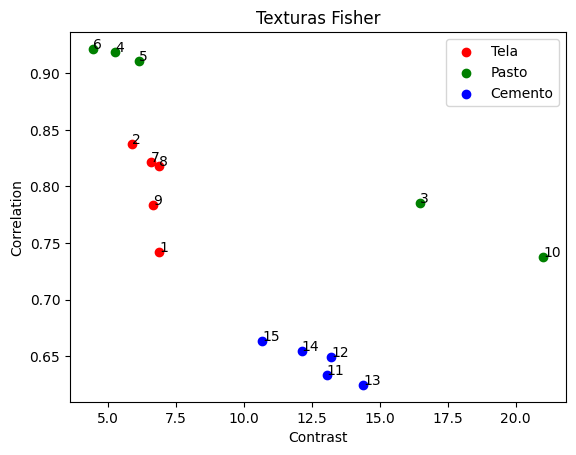

In [17]:
#Numeros de Imagen
tela = [9,8,7,2,1]
pasto = [6,5,4,3,10]
cemento = [15,14,13,12,11]

plt.figure()
# Graficar cada grupo con un color distinto
for grupo, color, nombre in zip([tela, pasto, cemento], ['red', 'green', 'blue'], ['Tela', 'Pasto', 'Cemento']):
    idx = [str(n) for n in grupo]
    plt.scatter(tble1.loc[idx, 'contrast'], tble1.loc[idx, 'correlation'], label=nombre, color=color)
    for i in idx:
        plt.annotate(i, (tble1['contrast'][i], tble1['correlation'][i]))

plt.xlabel('Contrast')
plt.ylabel('Correlation')
plt.title('Texturas Fisher')
plt.legend()

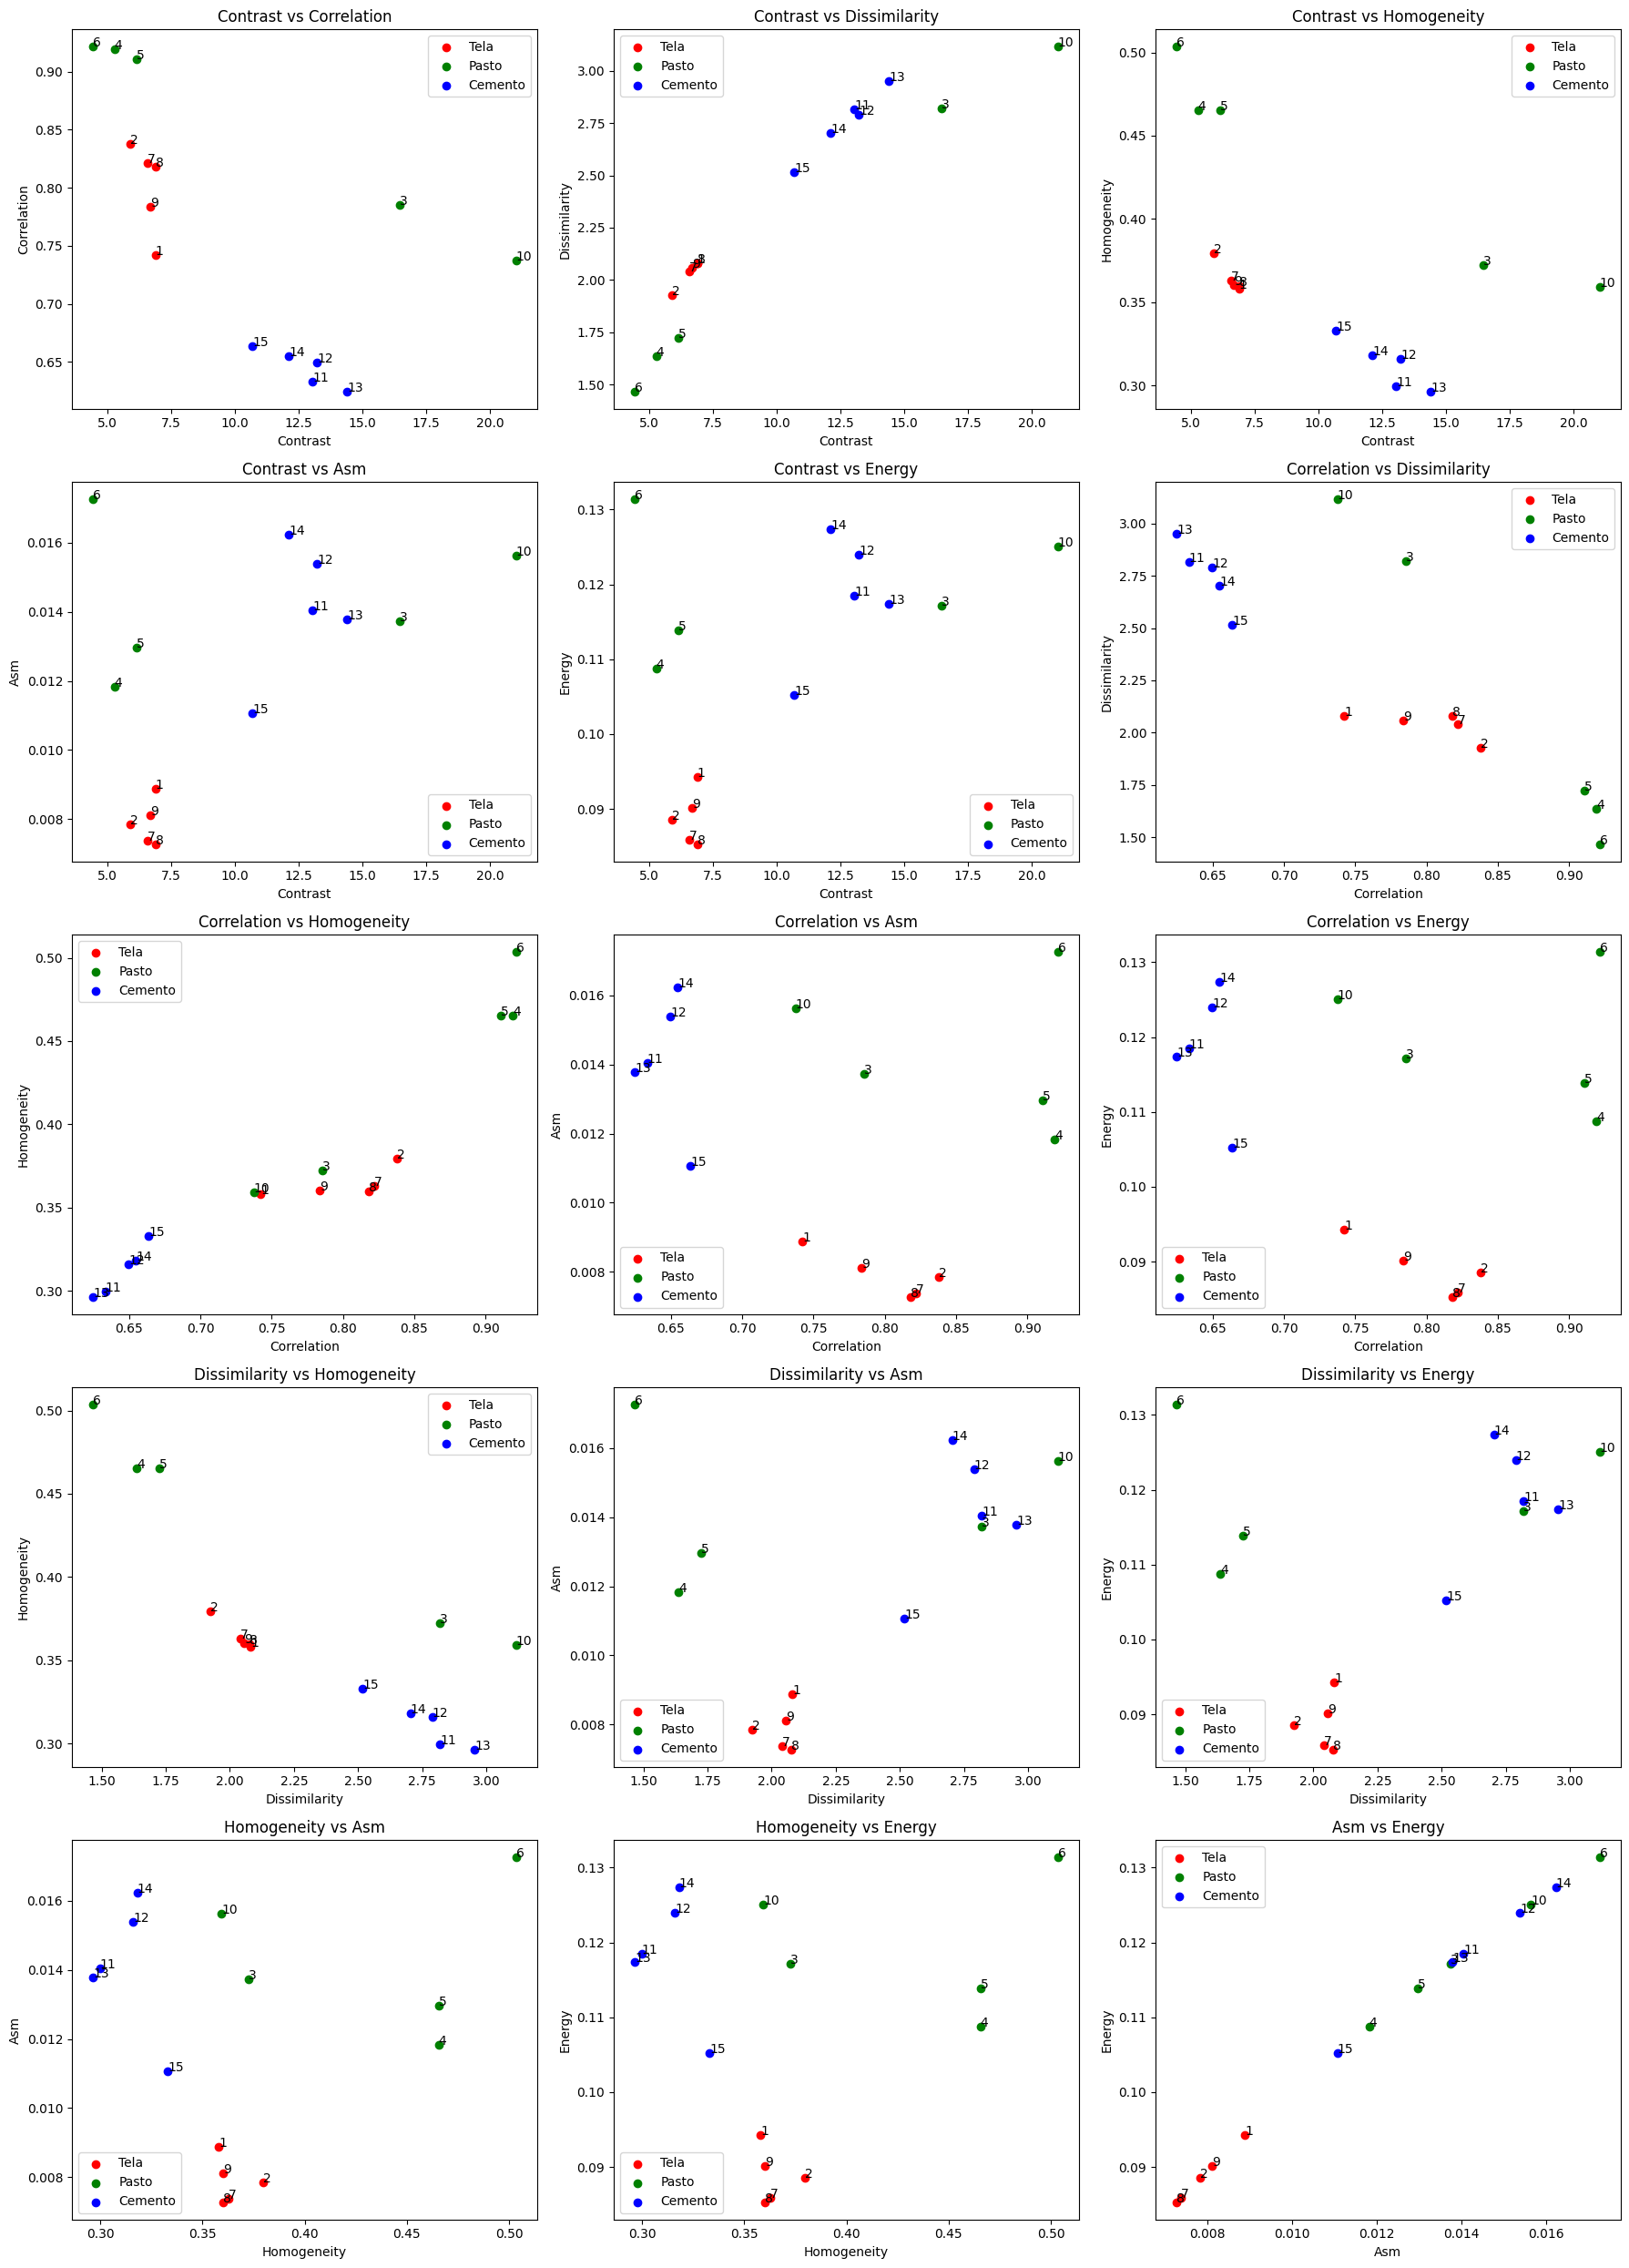

In [18]:
# Subplots para todas las combinaciones posibles de características
import itertools

features = ['contrast','correlation', 'dissimilarity','homogeneity','ASM','energy']
combinaciones = list(itertools.combinations(features, 2))
n = len(combinaciones)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
axs = axs.flatten()

for ax, (feat_x, feat_y) in zip(axs, combinaciones):
    for grupo, color, nombre in zip([tela, pasto, cemento], ['red', 'green', 'blue'], ['Tela', 'Pasto', 'Cemento']):
        idx = [str(n) for n in grupo]
        ax.scatter(tble1.loc[idx, feat_x], tble1.loc[idx, feat_y], label=nombre, color=color)
        for i in idx:
            ax.annotate(i, (tble1[feat_x][i], tble1[feat_y][i]))
    ax.set_xlabel(feat_x.capitalize())
    ax.set_ylabel(feat_y.capitalize())
    ax.set_title(f'{feat_x.capitalize()} vs {feat_y.capitalize()}')
    ax.legend()

for ax in axs[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()